# Locally weighted regression
1. Read and normalise the dataset 
2. Generate W for every query point !
3. No training involved , directly make predictions using closed form solution that we derived
(X'WX)inv * X'WY
4. Find the best value of Tau (Bandwidght parameter) [Cross validation]


In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [39]:
dfx = pd.read_csv('D:/LEARNING/DATA SCIENCE/MACHINE LEARNING/Locally Weighted Regression (LOWESS)/Dataset/weightedX.csv')
dfy = pd.read_csv('D:/LEARNING/DATA SCIENCE/MACHINE LEARNING/Locally Weighted Regression (LOWESS)/Dataset/weightedY.csv')

In [40]:
X = dfx.values
Y = dfy.values
print(X.shape)
print(Y.shape)

(99, 1)
(99, 1)


In [41]:
plt.style.use("seaborn")

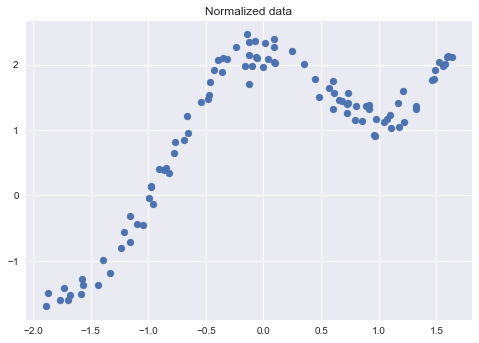

In [42]:
# Normalizing the data
u=X.mean()
std = X.std()
X = (X-u)/std
plt.title("Normalized data")
plt.scatter(X,Y)
plt.show()

# Finding out W(m/m) diagonal matrix
### a*b ==>a,b --> matrices -->Matrix Multiplication
### If a and b are arrys a*b ==> a,b --> array  --> Element Wise
### np.eye(5) it would givw us 5*5 diagonal matrix

In [43]:
print(type(np.mat(np.eye(5))))


<class 'numpy.matrix'>


# Generation of W(i) = e^(-(X(i)-X)^2/2*(tau)^2) , X(i) is a vector of features

In [44]:
def getW(query_point,X,tau):
    M = X.shape[0]
    W = np.mat(np.eye(M))
    
    for i in range(M):
        xi = X[i]
        x = query_point
        W[i,i] = np.exp(np.dot((xi-x),(xi-x).T)/(-2*tau*tau))
    return W
    

In [51]:
X = np.mat(X)
Y = np.mat(X)
M = X.shape[0]

W = getW(-1,X,100)
print(W.shape)
print(W)

(99, 99)
[[0.99997933 0.         0.         ... 0.         0.         0.        ]
 [0.         0.99999834 0.         ... 0.         0.         0.        ]
 [0.         0.         0.99997917 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.99994881 0.         0.        ]
 [0.         0.         0.         ... 0.         0.99987121 0.        ]
 [0.         0.         0.         ... 0.         0.         0.99975348]]


# If we increase tou the the weight matrix would be close to anidentity matrix as we would increase the bandwidth of the points from which the weight is to be calculated. It would be same as linear regression.

# Now we would work with prediction and again we would introduce a dummy feature x1 i.e. the hypothesis for 2 feature would be theta1*x1 + theta0*x0 where x0 = 1.

In [55]:
def prediction(X,Y,query_x,tau):
    ones = np.ones((M,1))
    X_ = np.hstack((X,ones)) # It would add a column which will have only 1 in it. 
    
    qx = np.mat([query_x,1])
    
    # getting weight matrix 
    W = getW(qx,X_,tau)
    
    # theta = (X'WX)inv * X'WY
    theta = np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*Y))  
    #print(theta.shape)
    pred = np.dot(qx,theta)
    return theta,pred

In [53]:
theta,pred = prediction(X,Y,1.0,1.0)
print(theta)

[[ 1.0000000e+00]
 [-8.8817842e-16]]


In [54]:
print(pred)

[[1.]]


# Visualize prediction and analysis effect of Tau

In [49]:
def plotPredictopn(tau):
    X_test = np.linspace(-2,2,20)
    Y_test = []
    
    for xq in X_test:
        theta,pred = prediction(X,Y,xq,tau)
        Y_test.append(pred[0][0])
    
    # Y_test must be converted into a numpy array as matplotlib would not print without numpy array
    Y_test = np.array(Y_test)
    XO = np.array(X)
    YO = np.array(Y)
    
    plt.title("Tau/Bandwidth Param %.2f"%tau)
    plt.scatter(XO,YO)
    plt.scatter(X_test,Y_test,color = 'red')
    plt.show()

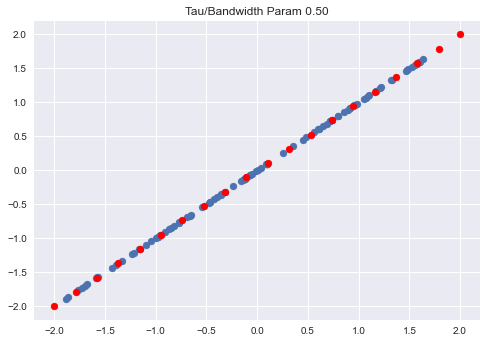

In [50]:
plotPredictopn(0.5)